## Module 2 In Class Project

1) Use your RGB to HSV function inside the nested pixel loop.
2) Apply to your image pipeline.

Extra credit
1) BGR to RGB function within the nested pixel loop.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
def draw_rect(img, top_left, bottom_right):
    rect_color = (255,0,0)

    thickness = 2

    # Apply rectangle.
    img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
    # Convert back to RGB
    img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rect)
    fig = plt.figure(figsize=(10,10))

In [18]:
def draw_mask(img, top_left_x, top_left_y, bottom_right_x, bottom_right_y):
    # Create a black mask
    mask = np.zeros(img.shape[:2], np.uint8)

    # Add the white portion
    mask[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = 255

    plt.imshow(mask, cmap='gray')
    fig = plt.figure(figsize=(10,10))
    return mask

In [26]:
def rgb_to_hsv(rgb):
    # Normalize color values
    rgb = [rgb[0]/255, rgb[1]/255, rgb[2]/255]
    
    #Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0
    
    v = np.max(rgb)
    vMin = np.min(rgb)
    
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0
    
    diff = (v - vMin)
    
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2])/diff
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0])/diff
    elif(rgb[2] == v):
        h= 240 + 60 * (rgb[0] - rgb[1])/diff
        
    # Interp Values
    h = round(h/2)
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    
    return np.array([h,s,v])

In [27]:
def bgr_to_rgb(bgr):
    return [bgr[2],bgr[1],bgr[0]]

In [33]:
def bgr_to_hsv_arr(bgr_arr):
    for y in range(0,bgr_arr.shape[0]):
        for x in range(0,bgr_arr.shape[1]):
            
            # Converts BGR Pixel arr to RGB Pixel arr
            temp = bgr_to_rgb(bgr_arr[y,x])
            
            #Convert RGB Pixel arr to HSV Pixel arr
            temp = rgb_to_hsv(temp)
            
            # Reassign Pixel arr
            bgr_arr[y,x] = temp

In [34]:
def grab_HSV_values(img, mask):
    # Convert to HSV
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    bgr_to_hsv_arr(img)

    # Plot the hue
    hist = cv2.calcHist([img], [0], mask, [256], [0,255])
    plt.plot(hist, color='red')
    plt.xlim([0,255])

    # Plot the saturation
    hist = cv2.calcHist([img], [1], mask, [256], [0,255])
    plt.plot(hist, color='green')
    plt.xlim([0,255])

    # Plot the value
    hist = cv2.calcHist([img], [2], mask, [256], [0,255])
    plt.plot(hist, color='blue')
    plt.xlim([0,255])
    
    plt.legend(('hue', 'saturation', 'value'), loc ='upper right')
    fig = plt.figure(figsize = (10,10))
    return img

In [35]:
def draw_skin(img, min_hsv, max_hsv):
    # Min and Max HSV values
    min_HSV = np.array(min_hsv, np.uint8)
    max_HSV = np.array(max_hsv, np.uint8)

    skinArea = cv2.inRange(img, min_HSV, max_HSV)

    # Bitwise And mask
    skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

    skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

    plt.imshow(skinHSV)
    fig = plt.figure(figsize = (10,10))

In [36]:
def skinMap(img_name):
    img = cv2.imread(img_name, 1)
    draw_rect(img, (275, 50), (440, 235))
    mask = draw_mask(img, 275, 50, 440, 235)    
    img = cv2.imread(img_name, 1)
    img = grab_HSV_values(img, mask)
    draw_skin(img, [105,40,10], [180,175,250])
    #draw_skin(img, [0,0,0], [255,255,255])

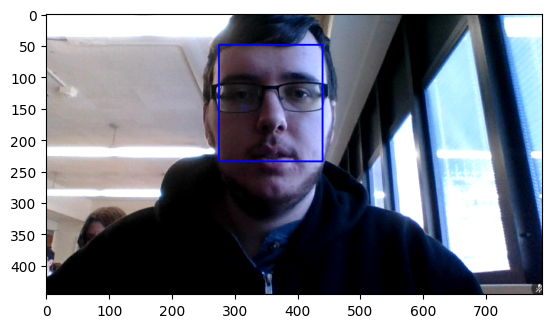

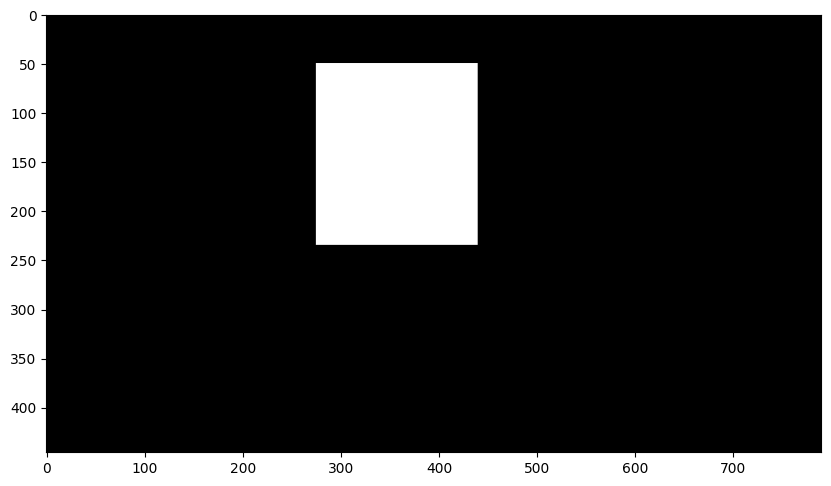

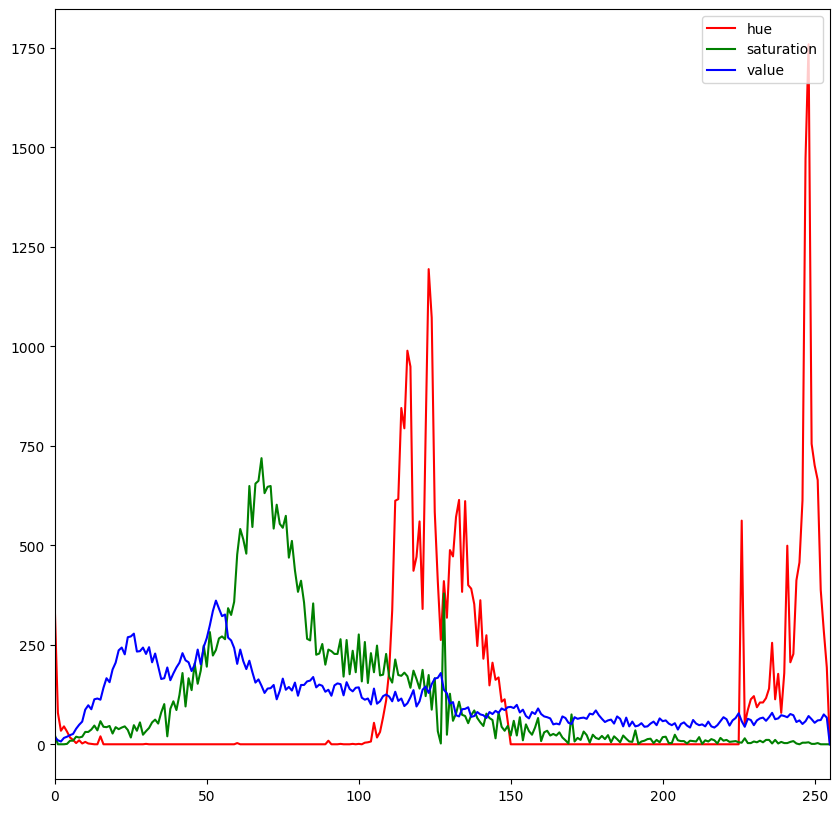

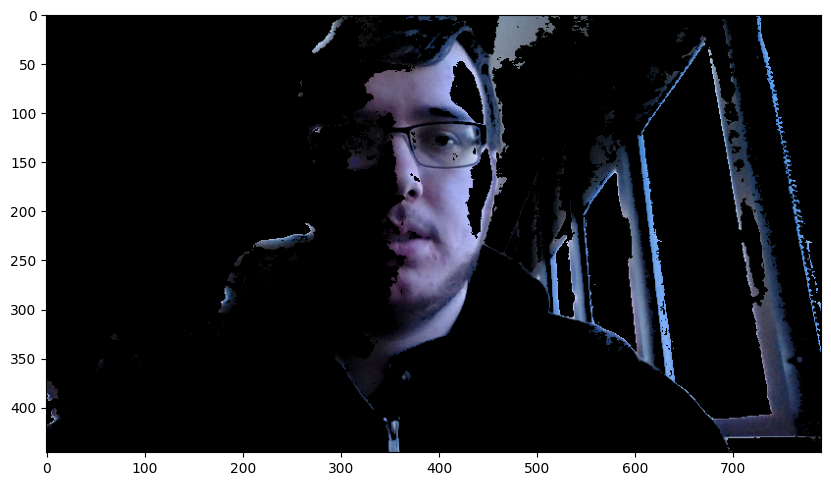

<Figure size 1000x1000 with 0 Axes>

In [37]:
skinMap('image.png')